In [1]:
import zarr
import sys
import allel
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def build_sample_zarr(input, output):
    allel.vcf_to_zarr(
        input=input,
        output=output,
        compressor=zarr.Blosc(cname='zstd', clevel=5, shuffle=0),
        overwrite=True,
        fields=['*'],
        alt_number=3,
        chunk_length=2**18,
        log=sys.stdout,
    )

In [3]:
input_vcf = 'merged.vcf'
output_path = 'merged.zarr'

In [4]:
build_sample_zarr(input_vcf, output_path)

/home/chris/anaconda3/lib/python3.6/site-packages/zarr/storage.py:372: FutureWarning: missing object_codec for object array; this will raise a ValueError in version 3.0
  'ValueError in version 3.0', FutureWarning)


[vcf_to_zarr] 262144 rows in 3.53s; chunk in 3.53s (74218 rows/s); Pf_M76611 :1563
[vcf_to_zarr] 266548 rows in 6.96s; chunk in 3.43s (1285 rows/s)
[vcf_to_zarr] all done (32916 rows/s)


In [5]:
callset = zarr.open_group('merged.zarr', mode='r')
callset

<zarr.hierarchy.Group '/' read-only>

In [6]:
list(callset['calldata'].keys())

['AD', 'DP', 'GQ', 'GT', 'PL']

In [26]:
samples = callset['samples'][:]
samples

array(['VBS00001', 'VBS00002', 'VBS00003', 'VBS00004', 'VBS00006',
       'VBS00008', 'VBS00009', 'VBS00010', 'VBS00011', 'VBS00012',
       'VBS00013', 'VBS00014', 'VBS00015', 'VBS00017', 'VBS00019',
       'VBS00020', 'VBS00021', 'VBS00022', 'VBS00023', 'VBS00024',
       'VBS00025', 'VBS00026', 'VBS00029', 'VBS00030', 'VBS00031',
       'VBS00032', 'VBS00033', 'VBS00034', 'VBS00035', 'VBS00036',
       'VBS00037', 'VBS00038', 'VBS00039', 'VBS00040', 'VBS00041',
       'VBS00042', 'VBS00043', 'VBS00044', 'VBS00045', 'VBS00046',
       'VBS00047', 'VBS00048', 'VBS00049', 'VBS00050', 'VBS00051',
       'VBS00052', 'VBS00053', 'VBS00055', 'VBS00059', 'VBS00061',
       'VBS00063', 'VBS00064', 'VBS00065', 'VBS00066', 'VBS00068',
       'VBS00069', 'VBS00071', 'VBS00072', 'VBS00074', 'VBS00075',
       'VBS00076', 'VBS00078', 'VBS00079', 'VBS00081', 'VBS00082',
       'VBS00083', 'VBS00084', 'VBS00085', 'VBS00086', 'VBS00087',
       'VBS00088', 'VBS00089', 'VBS00090', 'VBS00091', 'VBS000

In [7]:
callset['calldata/DP'][0].shape

(121,)

In [8]:
callset['calldata/GT'][:].shape

(266548, 121, 2)

In [9]:
callset['calldata/AD'][0][0]

array([-1, -1, -1, -1], dtype=int16)

In [15]:
chrom = callset['variants/CHROM'][:]
chromunq  = np.unique(chrom)
len(chromunq)

3918

In [16]:
chromunq

array(['Pf_M76611', 'chr2L.1', 'chr2L.10', ..., 'chrX.97', 'chrX.98',
       'chrX.99'], dtype=object)

In [17]:
gt = allel.GenotypeArray(callset['calldata/GT'])
gt

<GenotypeArray shape=(266548, 121, 2) dtype=int8>
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. 0/0 ./.
...
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.

In [18]:
ismiss = gt.is_missing()

In [19]:
ismiss

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [27]:
persnp_miss = np.count_nonzero(ismiss, axis=1)/121

In [44]:
np.count_nonzero(persnp_miss <= 0.15)

122683

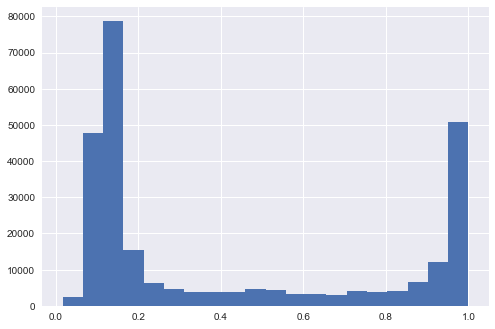

In [40]:
plt.hist(persnp_miss, bins=20);